In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:

np.random.seed(42)

data_size = 120

attendance = np.random.randint(50, 100, data_size)
study_hours = np.random.randint(3, 18, data_size)
assignments = np.random.randint(40, 100, data_size)
midterm = np.random.randint(35, 95, data_size)
previous_score = np.random.randint(40, 95, data_size)


final_score = (
    0.25 * attendance +
    0.20 * study_hours * 5 +
    0.20 * assignments +
    0.20 * midterm +
    0.15 * previous_score
) / 5

final_score = final_score.astype(int)

df = pd.DataFrame({
    "attendance": attendance,
    "study_hours": study_hours,
    "assignments": assignments,
    "midterm": midterm,
    "previous_score": previous_score,
    "final_score": final_score
})





,attendance,study_hours,assignments,midterm,previous_score,final_score
0,88,14,56,80,75,14
1,78,4,98,52,84,13
2,64,3,88,36,59,10
3,92,9,41,88,40,12
4,57,9,41,69,47,10


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attendance      120 non-null    int64
 1   study_hours     120 non-null    int64
 2   assignments     120 non-null    int64
 3   midterm         120 non-null    int64
 4   previous_score  120 non-null    int64
 5   final_score     120 non-null    int64
dtypes: int64(6)
memory usage: 5.8 KB


In [7]:
df.describe()

,attendance,study_hours,assignments,midterm,previous_score,final_score
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,73.458333,10.291667,69.441667,66.933333,68.883333,12.775000
std,14.478553,4.398999,18.105571,16.248456,16.244551,1.590214
min,50.000000,3.000000,40.000000,36.000000,40.000000,10.000000
25%,60.000000,6.750000,55.750000,56.000000,55.000000,12.000000
50%,73.000000,10.500000,70.500000,67.000000,69.000000,13.000000
75%,87.250000,14.000000,87.000000,80.250000,84.000000,14.000000
max,99.000000,17.000000,99.000000,94.000000,94.000000,18.000000


In [8]:
df.head()

,attendance,study_hours,assignments,midterm,previous_score,final_score
0,88,14,56,80,75,14
1,78,4,98,52,84,13
2,64,3,88,36,59,10
3,92,9,41,88,40,12
4,57,9,41,69,47,10


In [9]:
df.isnull().sum()


,0
attendance,0
study_hours,0
assignments,0
midterm,0
previous_score,0
final_score,0


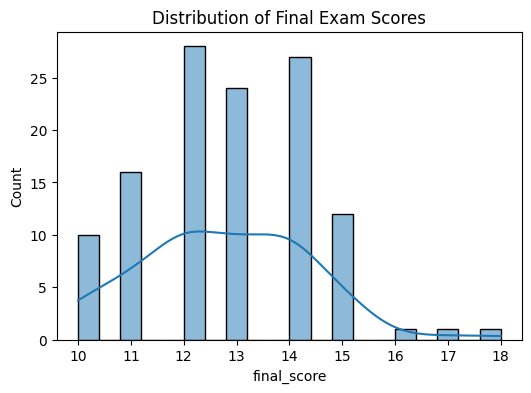

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["final_score"], bins=20, kde=True)
plt.title("Distribution of Final Exam Scores")
plt.show()


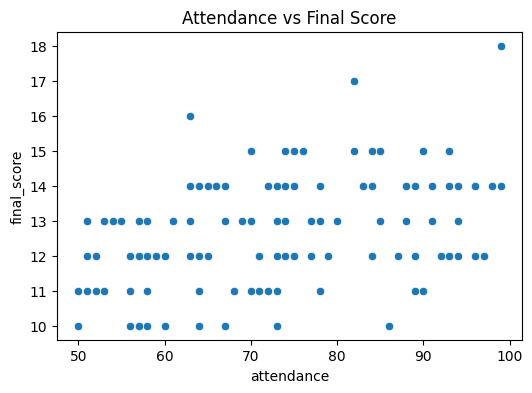

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="attendance", y="final_score", data=df)
plt.title("Attendance vs Final Score")
plt.show()


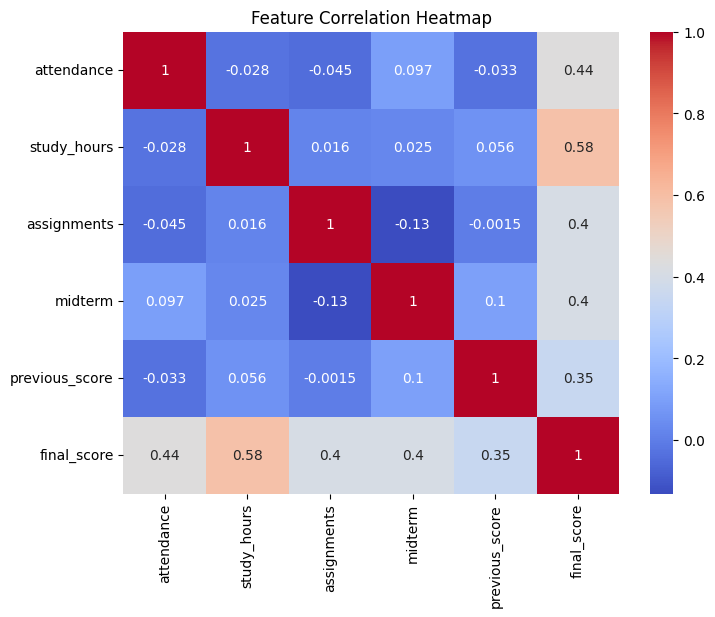

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
X = df.drop("final_score", axis=1)
y = df["final_score"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)


In [20]:
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_1 = r2_score(y_test, y_pred1)

print("Linear Regression Results:model1")
print("MAE:", mae_1)
print("RMSE:", rmse_1)
print("R2 Score:", r2_1)


Linear Regression Results:model1
MAE: 0.2545662785525184
RMSE: 0.2896161113478833
R2 Score: 0.9741777469991945


In [21]:
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)


In [23]:
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

print("Random Forest Results")
print("MAE:", mae_2)
print("RMSE:", rmse_2)
print("R2 Score:", r2_2)


Random Forest Results
MAE: 0.6458333333333334
RMSE: 0.8699185785654503
R2 Score: 0.7670268305718866


In [25]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_1, mae_2],
    "RMSE": [rmse_1, rmse_2],
    "R2 Score": [r2_1, r2_2]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.254566,0.289616,0.974178
1,Random Forest,0.645833,0.869919,0.767027


In [26]:
df.to_csv("student_performance_custom.csv", index=False)
